In [ ]:
import pandas as pd
df = pd.read_csv('/content/health care cost.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
import warnings


warnings.filterwarnings('ignore')
df = df.dropna()

#general information
df.describe()


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,0.485052,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,0.499963,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,1.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,63770.428010


In [ ]:
df['sex']=df['sex'].replace({'male':0,'female':1})
df['smoker']=df['smoker'].replace({'no':0,'yes':1})
print(df)

      age  sex     bmi  children  smoker     region      charges
0      19    1  27.900         0       1  southwest  16884.92400
1      18    0  33.770         1       0  southeast   1725.55230
2      28    0  33.000         3       0  southeast   4449.46200
3      33    0  22.705         0       0  northwest  21984.47061
4      32    0  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    0  30.970         3       0  northwest  10600.54830
1334   18    1  31.920         0       0  northeast   2205.98080
1335   18    1  36.850         0       0  southeast   1629.83350
1336   21    1  25.800         0       0  southwest   2007.94500
1337   61    1  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
df['region']=df['region'].replace({'southeast':0,'northwest':1})
print(df)

      age  sex     bmi  children  smoker     region      charges
0      19    1  27.900         0       1  southwest  16884.92400
1      18    0  33.770         1       0          0   1725.55230
2      28    0  33.000         3       0          0   4449.46200
3      33    0  22.705         0       0          1  21984.47061
4      32    0  28.880         0       0          1   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    0  30.970         3       0          1  10600.54830
1334   18    1  31.920         0       0  northeast   2205.98080
1335   18    1  36.850         0       0          0   1629.83350
1336   21    1  25.800         0       0  southwest   2007.94500
1337   61    1  29.070         0       1          1  29141.36030

[1338 rows x 7 columns]


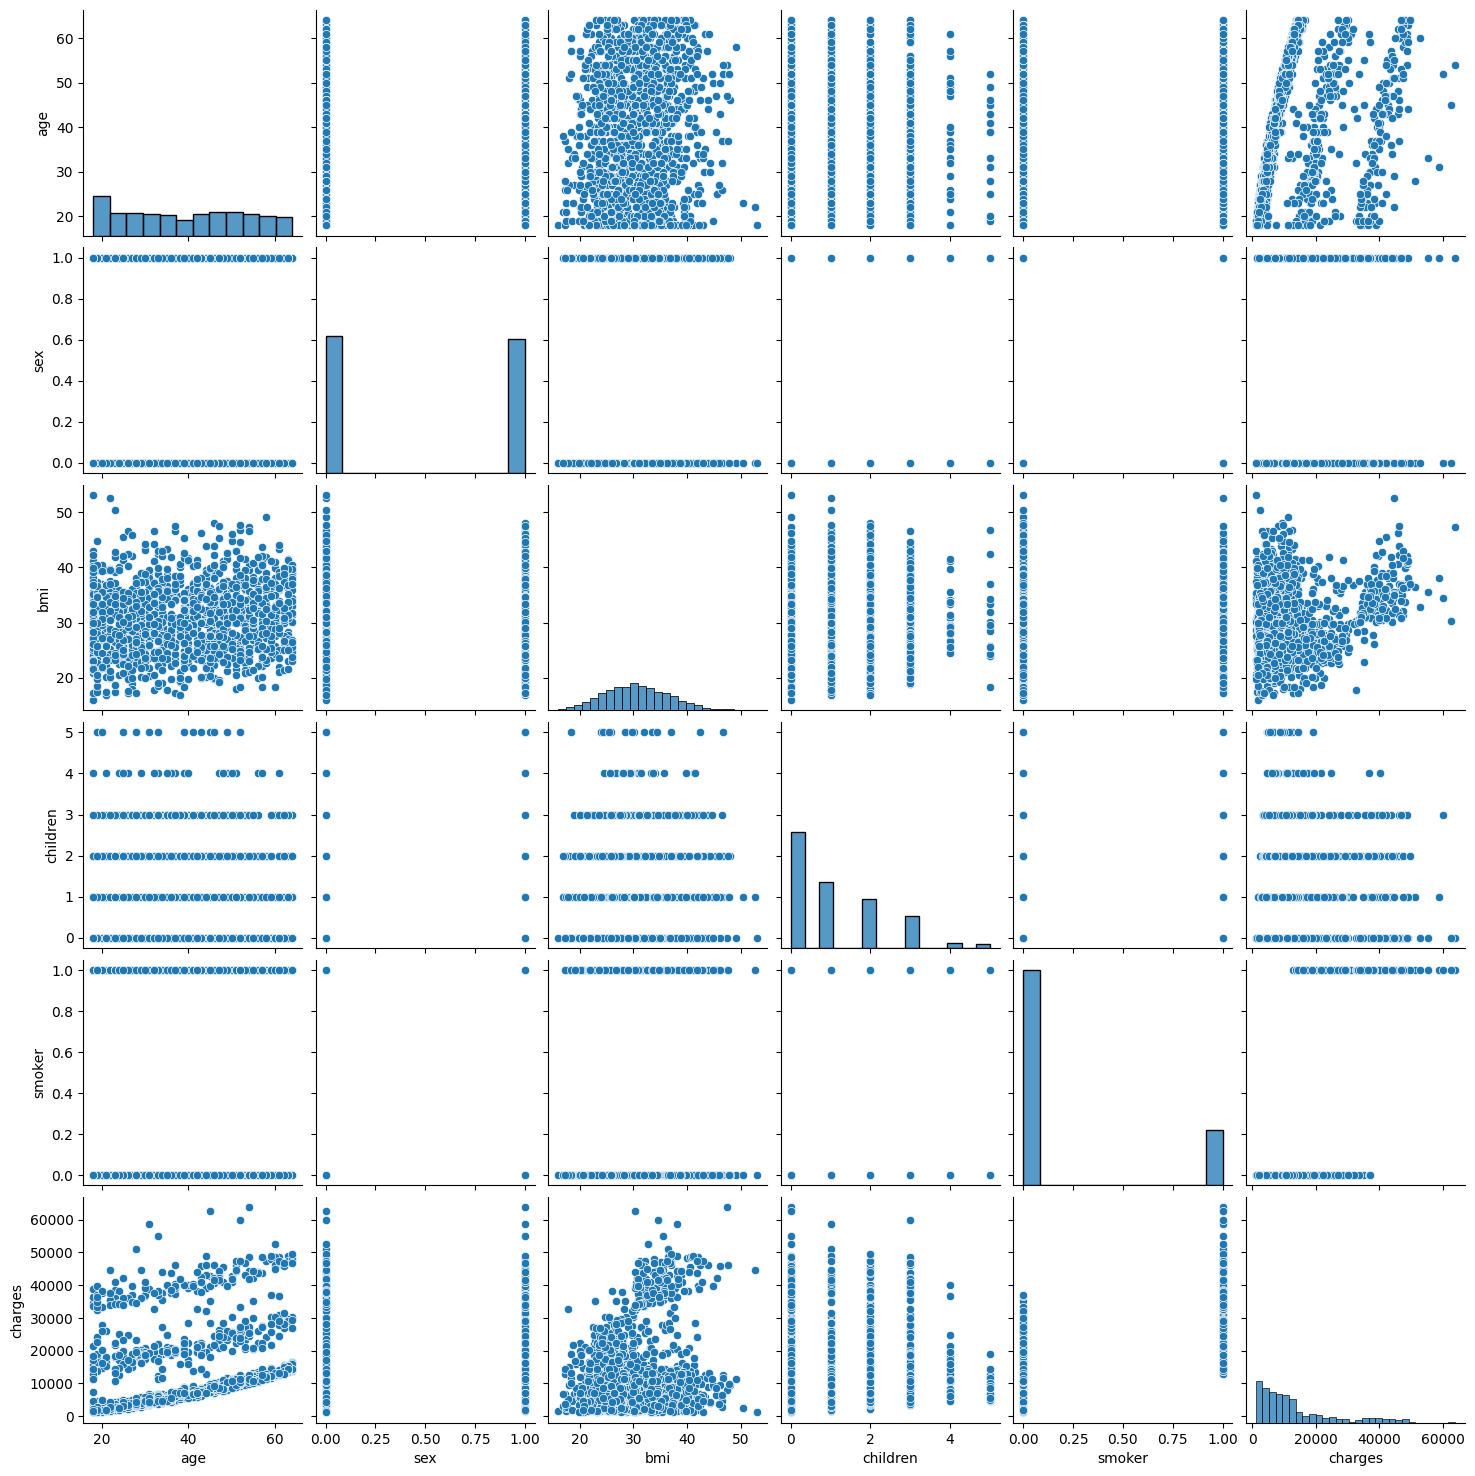

In [ ]:
import seaborn as sns
sns.pairplot(df)


In [ ]:
df['smoker']=df['smoker'].replace({'yes':0,'no':1})
df['region']=df['region'].replace({'southeast':0,'northwest':1})
df['region']=df['region'].replace({'southwest':0,'northeast':1})
print(df)


      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       0  16884.92400
1      18    0  33.770         1       0       0   1725.55230
2      28    0  33.000         3       0       0   4449.46200
3      33    0  22.705         0       0       1  21984.47061
4      32    0  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       1  10600.54830
1334   18    1  31.920         0       0       1   2205.98080
1335   18    1  36.850         0       0       0   1629.83350
1336   21    1  25.800         0       0       0   2007.94500
1337   61    1  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


<Axes: >

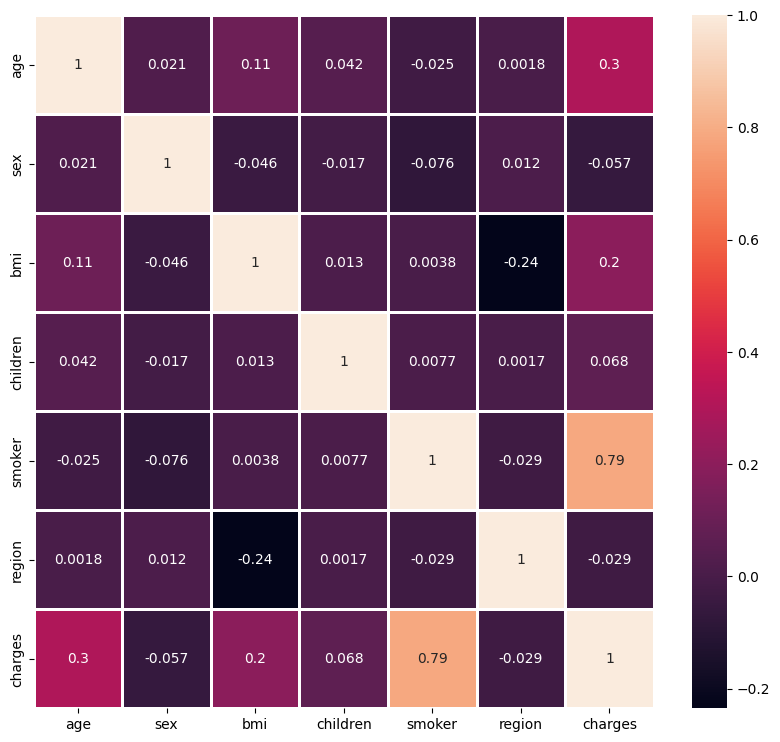

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True,linewidths=2)

<Axes: xlabel='cost', ylabel='age'>

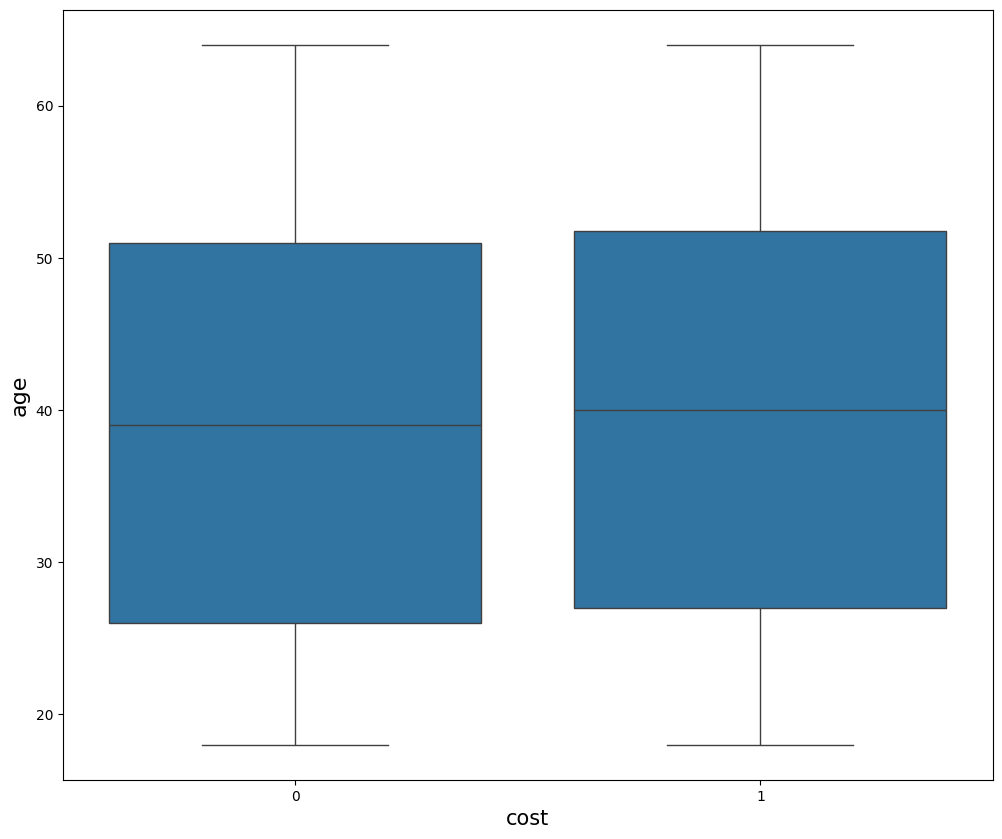

In [ ]:
plt.figure(figsize=(12,10))
plt.xlabel("cost",fontsize=15)
plt.ylabel("age",fontsize=16)
sns.boxplot(x='sex',y='age',data=df)

Text(0.5, 0, 'cost class')

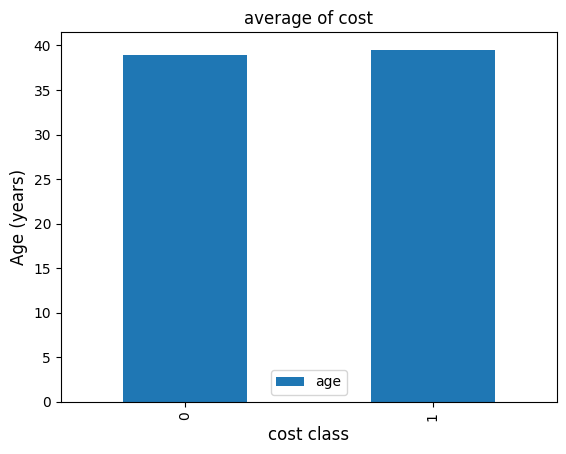

In [ ]:
f_class_Age=df.groupby('sex')['age'].mean()
f_class_Age=pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='age')
plt.title("average of cost",fontsize=12)
plt.ylabel("Age (years)",fontsize=12)
plt.xlabel("cost class",fontsize=12)

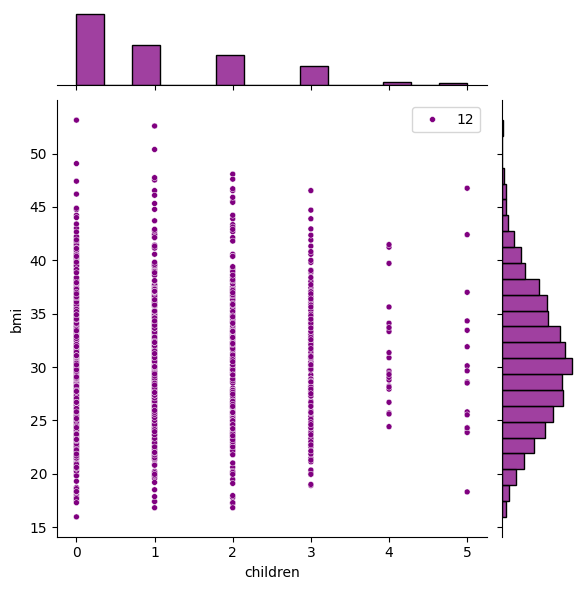

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.jointplot(x='children',y='bmi',data=df,color='purple',size=12)

In [ ]:
l_column=list(df.columns)
len_feature=len(l_column)
l_column

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [ ]:
x=df[l_column[0:len_feature-2]]
y=df[l_column[len_feature-2]]

In [ ]:
x.head()

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0


In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: region, dtype: int64

In [ ]:
df['smoker']=df['smoker'].replace({'yes':0,'no':1})
df['region']=df['region'].replace({'southeast':0,'northwest':1})
df['region']=df['region'].replace({'southwest':0,'northeast':1})
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       0  16884.92400
1      18    0  33.770         1       0       0   1725.55230
2      28    0  33.000         3       0       0   4449.46200
3      33    0  22.705         0       0       1  21984.47061
4      32    0  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       1  10600.54830
1334   18    1  31.920         0       0       1   2205.98080
1335   18    1  36.850         0       0       0   1629.83350
1336   21    1  25.800         0       0       0   2007.94500
1337   61    1  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [ ]:
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test= train_test_split(x , y, test_size=0.20, random_state=42)

In [ ]:
x_train.shape

(1070, 5)

In [ ]:
y_test.shape

(268,)

In [ ]:
x=df.iloc[:,0:6]
y=df.iloc[:,6:7]
print(x)
print(y)
y=y.fillna(0)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       1
4      32    0  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       1
1334   18    1  31.920         0       0       1
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       1

[1338 rows x 6 columns]
          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]


In [ ]:
x=df.iloc[:,0:6]
y=df.iloc[:,6:7]
print(x)
print(y)
y=y.fillna(0)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       1
4      32    0  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       1
1334   18    1  31.920         0       0       1
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       1

[1338 rows x 6 columns]
          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]


In [ ]:
#linearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.20, random_state=100)
print(x_train,y_train)
lg=LinearRegression()
nn=lg.fit(x_train,y_train)
print(nn.score(x_test,y_test))
print(nn.score(x_train,y_train))

      age  sex     bmi  children  smoker  region
1306   29    1  21.850         0       1       1
124    47    1  33.915         3       0       1
588    61    1  35.910         0       0       1
1127   35    1  35.860         2       0       0
201    48    1  32.230         1       0       0
...   ...  ...     ...       ...     ...     ...
802    21    0  22.300         1       0       0
53     36    0  34.430         0       1       0
350    57    1  23.180         0       0       1
79     41    1  32.965         0       0       1
792    22    1  23.180         0       0       1

[1070 rows x 6 columns]           charges
1306  16115.30450
124   10115.00885
588   13635.63790
1127   5836.52040
201    8871.15170
...           ...
802    2103.08000
53    37742.57570
350   11830.60720
79     6571.02435
792    2731.91220

[1070 rows x 1 columns]
0.7951346445854041
0.7378933575624439


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

In [ ]:
y_train.head()

,charges
405,11396.90020
835,7160.33030
483,9880.06800
319,4667.60765
956,41999.52000


In [ ]:
x=df.iloc[:,0:6]
y=df.iloc[:,6:7]
print(x)
print(y)
y=y.fillna(0)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       1
4      32    0  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       1
1334   18    1  31.920         0       0       1
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       1

[1338 rows x 6 columns]
          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]


In [ ]:
df['smoker']=df['smoker'].replace({'yes':0,'no':1})
df['region']=df['region'].replace({'southeast':0,'northwest':1})
df['region']=df['region'].replace({'southwest':0,'northeast':1})
df['sex']=df['sex'].replace({'male':0,'female':1})

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df[['age', 'bmi', 'children','sex','region','smoker']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 123067248.41


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
X = df[['age', 'bmi', 'children','smoker','sex','region']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 28351233.74252797


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
X = df[['age', 'bmi', 'children','sex','region','smoker']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 43769611.26276469
